In [1]:
### install dependencies:

# might need to install opencv
!pip3 install Cython cupy-cuda112 cupy-cuda102   # Probably only need one of these but it works so I'm gonna leave it for now.
!pip3 install pyyaml==5.1

# Torch 1.8.1 does not work despite being the latest stable release. As such, use 1.7. 
# Cuda version on MAGEOHub is currently 11.3 - cu110 all works fine.

# To be tried once the bug with torch 1.8 has been fixed 
#!pip3 install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio==0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

!pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
!python -m pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu110/torch1.7/index.html

distutils: /opt/conda/include/python3.8/UNKNOWN
sysconfig: /opt/conda/include/python3.8
user = False
home = None
root = None
prefix = None
distutils: /opt/conda/include/python3.8/UNKNOWN
sysconfig: /opt/conda/include/python3.8
user = False
home = None
root = None
prefix = None
distutils: /opt/conda/include/python3.8/UNKNOWN
sysconfig: /opt/conda/include/python3.8
user = False
home = None
root = None
prefix = None
distutils: /opt/conda/include/python3.8/UNKNOWN
sysconfig: /opt/conda/include/python3.8
user = False
home = None
root = None
prefix = None
distutils: /opt/conda/include/python3.8/UNKNOWN
sysconfig: /opt/conda/include/python3.8
user = False
home = None
root = None
prefix = None
Looking in links: https://download.pytorch.org/whl/torch_stable.html
distutils: /opt/conda/include/python3.8/UNKNOWN
sysconfig: /opt/conda/include/python3.8
user = False
home = None
root = None
prefix = None
distutils: /opt/conda/include/python3.8/UNKNOWN
sysconfig: /opt/conda/include/python3.8
user = Fa

In [2]:
# Import torch and check versions and cuda availability, and resources
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
!nvcc --version
!nvidia-smi

from IPython.display import display, clear_output

1.7.1+cu110 True
gcc (Ubuntu 9.3.0-17ubuntu1~20.04) 9.3.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Mar_21_19:15:46_PDT_2021
Cuda compilation tools, release 11.3, V11.3.58
Build cuda_11.3.r11.3/compiler.29745058_0
Fri Aug 13 18:36:49 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.181.07   Driver Version: 418.181.07   CUDA Version: 11.3     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SX

In [3]:
# Some basic imports:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# tensorboard?
#%load_ext tensorboard
#%tensorboard --logdir output

# necessary libraries
import pandas as pd
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np
import json

#from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.structures import BoxMode

In [4]:
# Make sure the inevitable error messages are useful.
CUDA_LAUNCH_BLOCKING="1"

In [5]:
# Setup to predict on new images, here setting up for the trees_test dataset, but can also use this setup
# for predicting on individual images as seen 2 cells down

from detectron2.utils.visualizer import ColorMode
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"))
cfg.DATALOADER.NUM_WORKERS = 2
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1

### path to the saved pre-trained model weights
cfg.MODEL.WEIGHTS = '/home/jovyan/detectron2_live/train_test/output/model_final.pth'

# set confidence threshold at which we predict
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.15

predictor = DefaultPredictor(cfg)

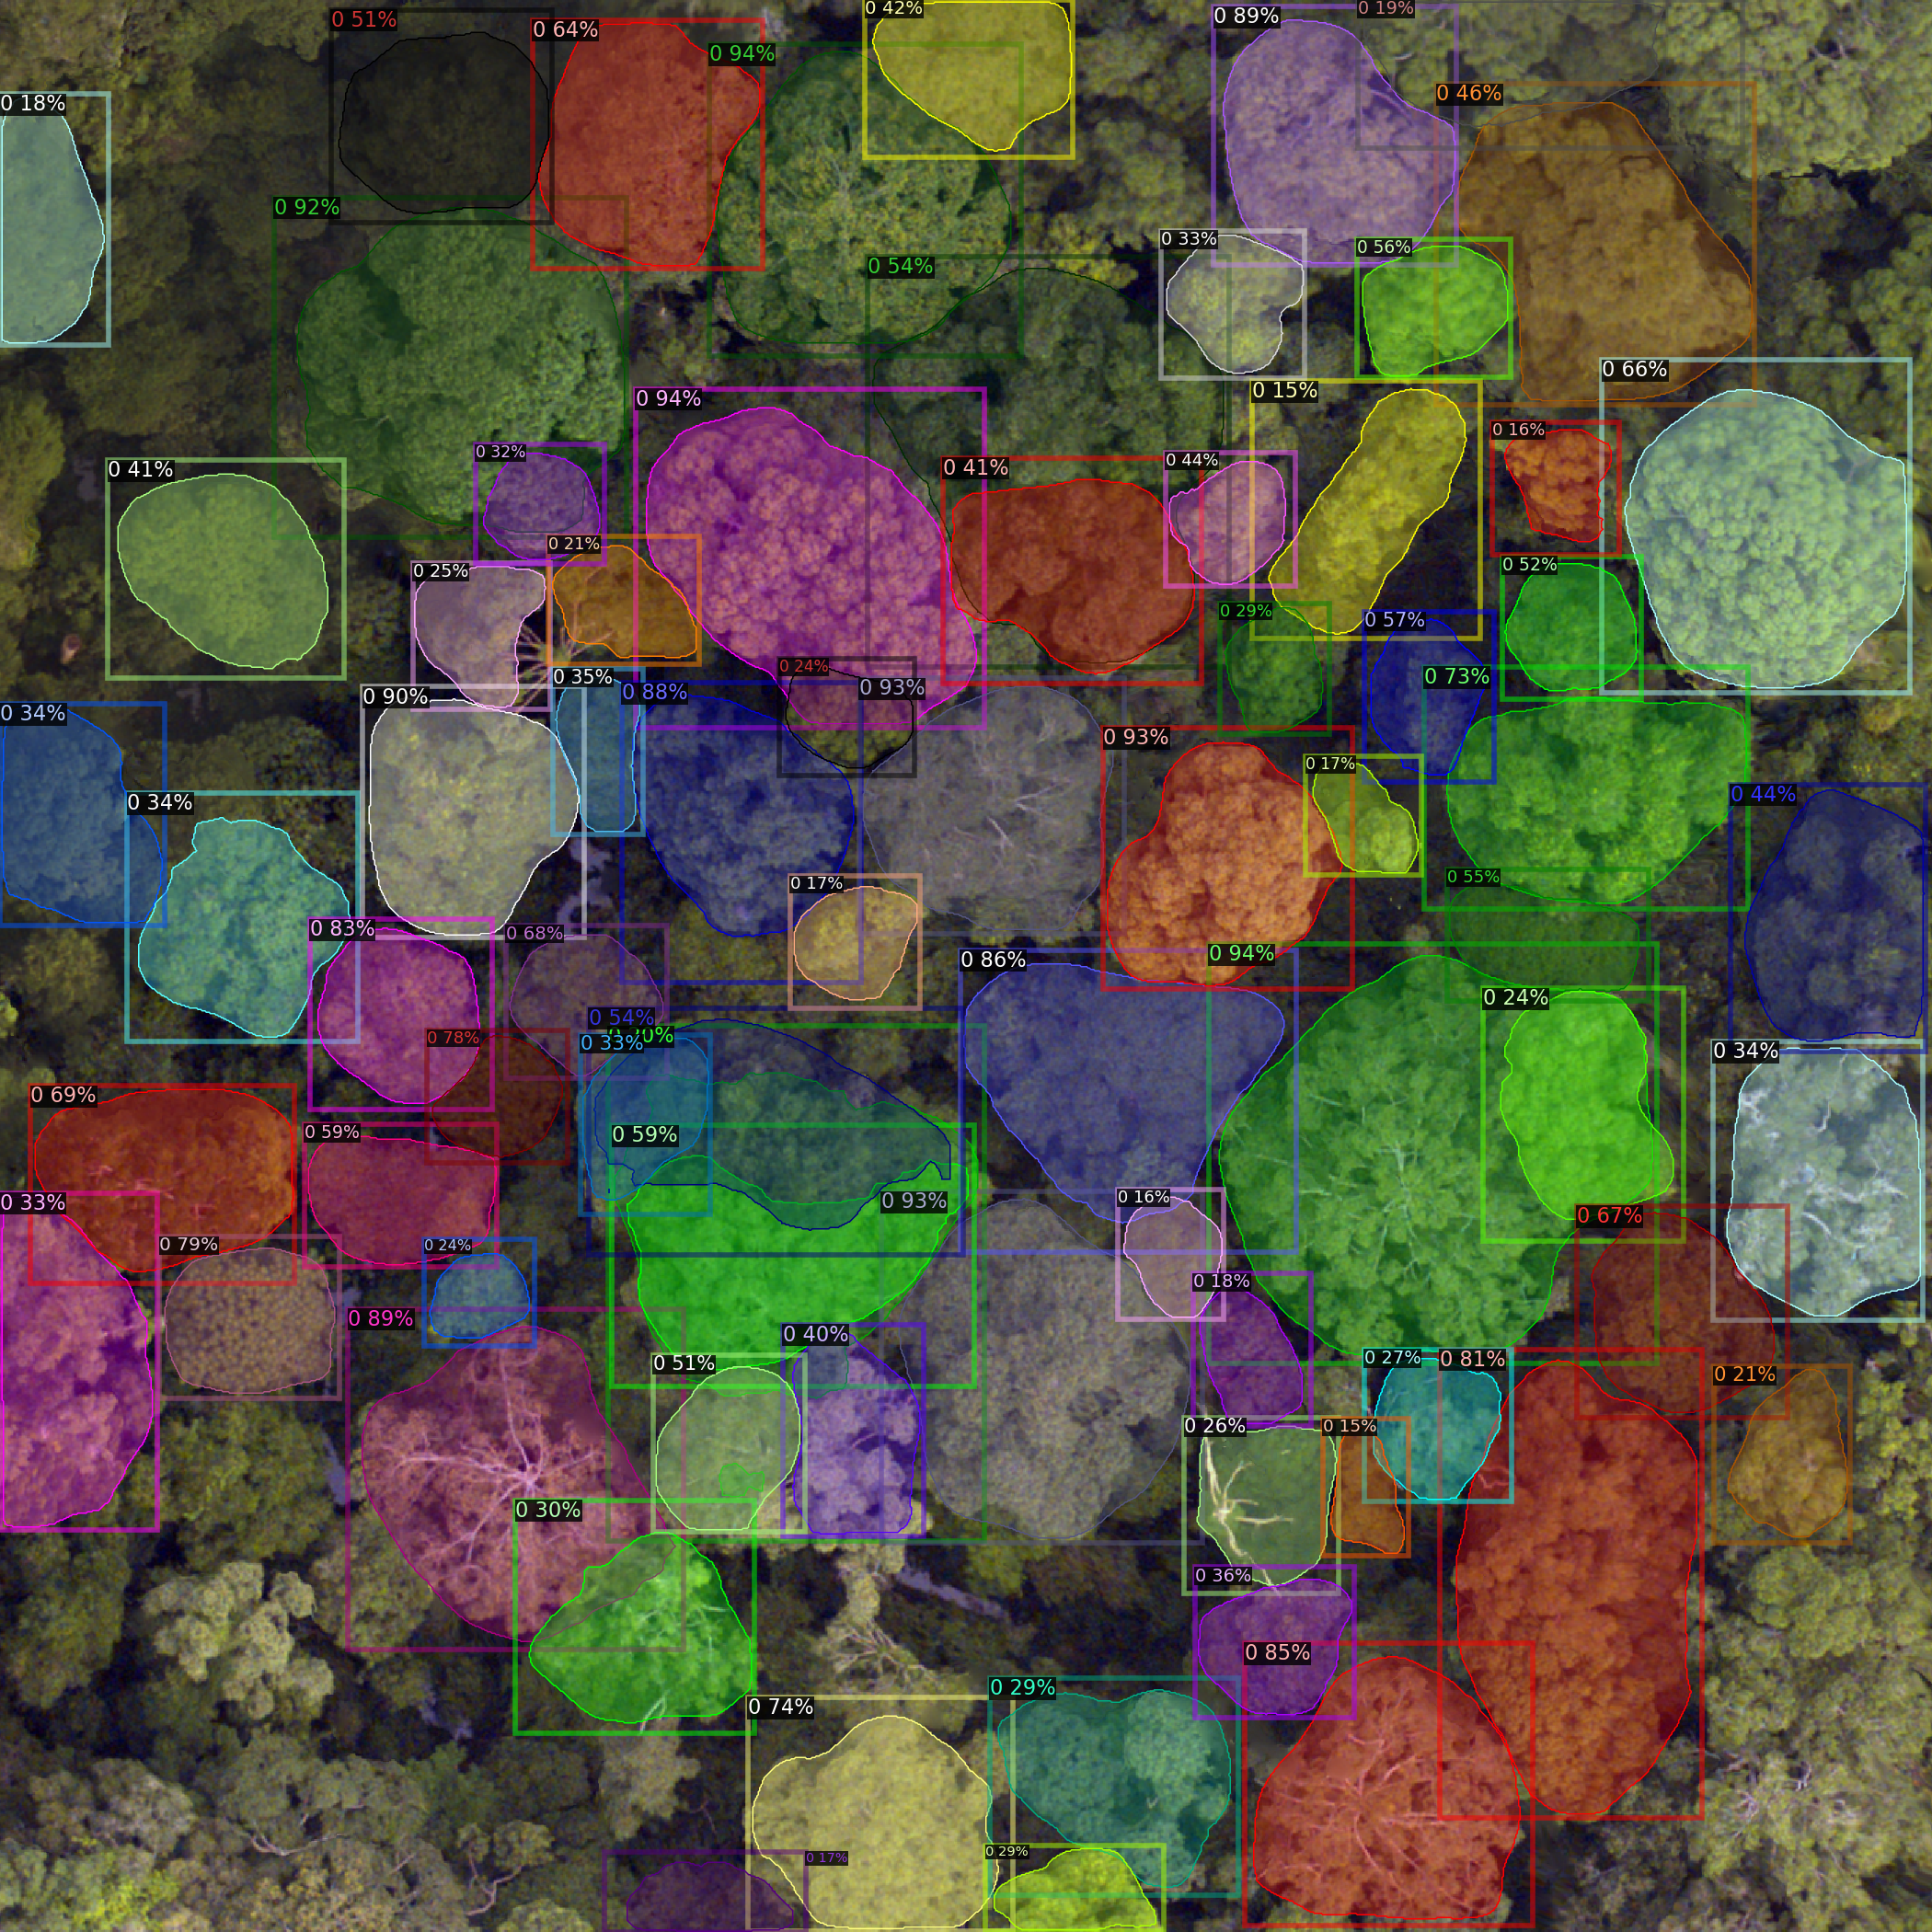

In [7]:
# make and visualise predictions, on a particular file 

# give the image that we are trying to predict on

im = cv2.imread("/home/jovyan/lustre_scratch/sepilok_data/spare_pngs/tile_603000_646900.png")
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1], scale=1.5, instance_mode=ColorMode.IMAGE_BW)   # remove the colors of unsegmented pixels
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
image = cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB)
display(Image.fromarray(image))